# Hands-on 2: Parametrized gates




In this jupyter notebook the goal is to learn how to apply parametrized gates and emphazise the link between amplitude and probability.

## Parametrized gates

### 1 qubit rotation

The first step will be to create a simple circuit with:
+ a single qubit
+ a single gate

Your goal is to create a superposition of:
+ 30% to get the state 0
+ 70% to get the state 1


<table>
    <tr><td>
        <img src="qrotation.png"></td>
    </tr>
</table>

You need to know that:
+ the initial state is $|\psi_0> = |0> =\begin{pmatrix} 1  \\  0 \end{pmatrix}$
+ a general state can be represented as $|\psi> = \alpha|0> + \beta|1> =\begin{pmatrix} \alpha  \\  \beta \end{pmatrix}$
+ generaly, $p(0) = |\alpha|^2$ and $p(0) = |\beta|^2$

We will use a single rotation along the y-axis to obtain 30% for |0> and 70% for |1>:
+ $R_y(\theta) = e^{-i\theta Y/2}= \cos \frac{\theta}{2}I - i \sin \frac{\theta}{2} Y = 
\begin{pmatrix}
    \cos \frac{\theta}{2} & -\sin\frac{\theta}{2} \\
    \sin\frac{\theta}{2} & \cos\frac{\theta}{2} 
\end{pmatrix}$

Complete the following cell by:
+ putting the right number of qubits for this example
+ the right angle for the rotation

In [1]:
#Import AQASM
from qat.lang.AQASM import *

#Create a program
prog = Program()

#Allocate qubits
qbits = prog.qalloc(1)

#Apply the rotation gate
prog.apply(RY(1.9823), qbits[0]) 

Display the circuit by executing the following cell:

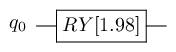

In [2]:
#Create the circuit from the program
circuit = prog.to_circ()

#Display the circuit
%qatdisplay circuit

Execute the following to print the full distribution of the circuit and see if you obtain the good result:

In [3]:
#Create a Job from the circuit
job = circuit.to_job()

#Import and create the linear algebra simulator
from qat.qpus import LinAlg
linalgqpu = LinAlg()

#Submit the job to the simulator LinAlg and get the results
result = linalgqpu.submit(job)

#Print the results
for sample in result:
    print("State %s probability %s" % (sample.state, sample.probability))

State |0> probability 0.30000603658125197
State |1> probability 0.699993963418748


Complete the following cell to see what happen if you apply the same angle with a x-axis rotation:
+ $R_x(\theta) = e^{-i\theta X/2}= \cos \frac{\theta}{2}I - i \sin \frac{\theta}{2} X = 
\begin{pmatrix}
    \cos \frac{\theta}{2} & -i\sin\frac{\theta}{2} \\
    -i\sin\frac{\theta}{2} & \cos\frac{\theta}{2} 
\end{pmatrix}$

In [4]:
#Import AQASM
from qat.lang.AQASM import *

#Create your program
prog = Program()

#Allocate the qubit
qbits = prog.qalloc(1) 

#Apply the rotation gate
prog.apply(RX(1.9823), qbits[0]) 

#Create the circuit
circuit = prog.to_circ()

#Create the job
job = circuit.to_job()

#Import LinAlg
from qat.qpus import LinAlg
linalgqpu = LinAlg()

#Submit the job to the simulator and collect the results
result = linalgqpu.submit(job)

#Print the results
for sample in result:
    print("State %s probability %s" % (sample.state, sample.probability))

State |0> probability 0.30000603658125197
State |1> probability 0.699993963418748


### 2 qubits rotation

Let's continue with:
+ two qubits
+ two gates

the result we want is:
+ 24% for |00>
+ 56% for |01>
+ 6%  for |10>
+ 14% for |11>

without entanglement and two qubits:
+ |$q_0$> = $\alpha_0 |0> + \beta_0 |1>$ with $|\alpha_0|^2 + |\beta_0|^2 = 1$
+ |$q_1$> = $\alpha_1 |0> + \beta_1 |1>$ with $|\alpha_1|^2 + |\beta_1|^2 = 1$
+ $|q_0>|q_1> = \alpha_0 \alpha_1 |00> + \alpha_0 \beta_1 |01> + \beta_0 \alpha_1 |10>  + \beta_0 \beta_1 |11>$

Complete the two angles in the following cell to get the good result (Hint: it is possible to reuse the previous 1 qubit rotation part):

In [ ]:
#Import AQASM
from qat.lang.AQASM import *

#Create a program
prog = Program()

#Allocate qubits
qbits = prog.qalloc(2) 

#Apply the first rotation gate
prog.apply(RY(0.927295), qbits[0]) 
#Apply the second rotation gate
prog.apply(RY(1.9823), qbits[1]) 

#Create the circuit
circuit = prog.to_circ()

#Create the job
job = circuit.to_job()

#Import the simulator
from qat.qpus import LinAlg

#Create the simulator 
linalgqpu = LinAlg()

#Submit the job and gather the results
result = linalgqpu.submit(job)

#Print the resutls
for sample in result:
    print("State %s probability %s" % (sample.state, sample.probability))

This hands-on have emphasize the link between the amplitude and the probability, on top of practicing parametrized gates.